In [126]:
# Step 1: Import libraries. 
# Step 2: Load the dataset. 
# Step 3: Find missing values. 
# Step 4: Handle missing values (mean,median,mode, or drop). 
# Step 5: Covert texts into lowercase. 
# Step 5.5: Check for duplicates and remove them. 
# Step 6: Handle outliers (IQR method)
# Step 7: Convert data types. 
# Step 8: Encode categorical variables. (categorical into numerical data)
# Step 9: Save the dataset. 


In [127]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('sample_data_cleaning_project.csv')
df.head()

,Name,Age,Salary,Join_Date,Department
0,Pam,25.0,70200.0,1/15/2023,HR
1,Jane,NaN,65000.0,8/1/2022,Finance
2,Alice,22.0,71350.0,5/20/2021,HR
3,Bob,22.0,NaN,1/15/2023,IT
4,Pam,25.0,71250.0,1/15/2023,HR


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        43 non-null     object 
 1   Age         39 non-null     float64
 2   Salary      36 non-null     float64
 3   Join_Date   43 non-null     object 
 4   Department  43 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.8+ KB


In [130]:
df.describe()

,Age,Salary
count,39.000000,36.000000
mean,34.692308,132729.694444
std,9.624951,196694.464572
min,21.000000,61000.000000
25%,25.000000,66175.000000
50%,36.000000,71841.000000
75%,42.000000,77421.000000
max,57.000000,921000.000000


In [131]:
df.isna().sum()

Name          0
Age           4
Salary        7
Join_Date     0
Department    0
dtype: int64

In [132]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

df = df.dropna(subset=['Join_Date'])


In [133]:
df.isna().sum()

Name          0
Age           0
Salary        0
Join_Date     0
Department    0
dtype: int64

In [134]:
df.head(20)

,Name,Age,Salary,Join_Date,Department
0,Pam,25.0,70200.0,1/15/2023,HR
1,Jane,36.0,65000.0,8/1/2022,Finance
2,Alice,22.0,71350.0,5/20/2021,HR
3,Bob,22.0,71841.0,1/15/2023,IT
4,Pam,25.0,71250.0,1/15/2023,HR
5,Jade,40.0,71841.0,1/15/2023,Finance
6,Joanne,25.0,120000.0,1/16/2023,IT
7,Kim,33.0,71568.0,8/30/2021,HR
8,Sam,40.0,71841.0,9/5/2022,IT
9,Eli,36.0,80100.0,3/4/2022,HR


In [135]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df.head()

,Name,Age,Salary,Join_Date,Department
0,pam,25.0,70200.0,1/15/2023,hr
1,jane,36.0,65000.0,8/1/2022,finance
2,alice,22.0,71350.0,5/20/2021,hr
3,bob,22.0,71841.0,1/15/2023,it
4,pam,25.0,71250.0,1/15/2023,hr


In [136]:
df = df.drop_duplicates(subset=['Name', 'Age'])
print(df)

        Name   Age    Salary  Join_Date Department
0        pam  25.0   70200.0  1/15/2023         hr
1       jane  36.0   65000.0   8/1/2022    finance
2      alice  22.0   71350.0  5/20/2021         hr
3        bob  22.0   71841.0  1/15/2023         it
5       jade  40.0   71841.0  1/15/2023    finance
6     joanne  25.0  120000.0  1/16/2023         it
7        kim  33.0   71568.0  8/30/2021         hr
8        sam  40.0   71841.0   9/5/2022         it
9        eli  36.0   80100.0   3/4/2022         hr
10       joe  22.0   62000.0  10/9/2022    finance
11      anna  36.0   72456.0   4/6/2022         hr
12       dan  43.0   71841.0  1/15/2023         hr
13     susan  46.0   66000.0   5/3/2022    finance
14    pamela  36.0   77421.0   4/2/2023         hr
15      susy  41.0  126001.0   2/2/2023         it
16      ruth  30.0   72114.0   9/5/2022         hr
19     clark  44.0   76982.0  1/28/2023         hr
20    alissa  36.0   77421.0  10/5/2022         hr
21     norma  51.0  921000.0   

In [137]:
df.duplicated().sum()

np.int64(0)

In [138]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1 


df = df[(df['Salary'] >= Q1 - 1.5 * IQR) & (df['Salary'] <= Q3 + 1.5 * IQR)]
print(df)

        Name   Age   Salary  Join_Date Department
0        pam  25.0  70200.0  1/15/2023         hr
1       jane  36.0  65000.0   8/1/2022    finance
2      alice  22.0  71350.0  5/20/2021         hr
3        bob  22.0  71841.0  1/15/2023         it
5       jade  40.0  71841.0  1/15/2023    finance
7        kim  33.0  71568.0  8/30/2021         hr
8        sam  40.0  71841.0   9/5/2022         it
9        eli  36.0  80100.0   3/4/2022         hr
10       joe  22.0  62000.0  10/9/2022    finance
11      anna  36.0  72456.0   4/6/2022         hr
12       dan  43.0  71841.0  1/15/2023         hr
13     susan  46.0  66000.0   5/3/2022    finance
14    pamela  36.0  77421.0   4/2/2023         hr
16      ruth  30.0  72114.0   9/5/2022         hr
19     clark  44.0  76982.0  1/28/2023         hr
20    alissa  36.0  77421.0  10/5/2022         hr
22   anthony  30.0  61000.0   8/6/2021    finance
23       eli  21.0  77421.0   3/4/2022         hr
24      tony  36.0  66200.0  5/18/2023    finance


In [139]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'])
print(df)

        Name   Age   Salary  Join_Date Department
0        pam  25.0  70200.0 2023-01-15         hr
1       jane  36.0  65000.0 2022-08-01    finance
2      alice  22.0  71350.0 2021-05-20         hr
3        bob  22.0  71841.0 2023-01-15         it
5       jade  40.0  71841.0 2023-01-15    finance
7        kim  33.0  71568.0 2021-08-30         hr
8        sam  40.0  71841.0 2022-09-05         it
9        eli  36.0  80100.0 2022-03-04         hr
10       joe  22.0  62000.0 2022-10-09    finance
11      anna  36.0  72456.0 2022-04-06         hr
12       dan  43.0  71841.0 2023-01-15         hr
13     susan  46.0  66000.0 2022-05-03    finance
14    pamela  36.0  77421.0 2023-04-02         hr
16      ruth  30.0  72114.0 2022-09-05         hr
19     clark  44.0  76982.0 2023-01-28         hr
20    alissa  36.0  77421.0 2022-10-05         hr
22   anthony  30.0  61000.0 2021-08-06    finance
23       eli  21.0  77421.0 2022-03-04         hr
24      tony  36.0  66200.0 2023-05-18    finance


In [140]:
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

binary_columns = [col for col in df.columns if col.startswith('Department_')]
df[binary_columns] = df[binary_columns].astype(int)

print(df)

        Name   Age   Salary  Join_Date  Department_hr  Department_it
0        pam  25.0  70200.0 2023-01-15              1              0
1       jane  36.0  65000.0 2022-08-01              0              0
2      alice  22.0  71350.0 2021-05-20              1              0
3        bob  22.0  71841.0 2023-01-15              0              1
5       jade  40.0  71841.0 2023-01-15              0              0
7        kim  33.0  71568.0 2021-08-30              1              0
8        sam  40.0  71841.0 2022-09-05              0              1
9        eli  36.0  80100.0 2022-03-04              1              0
10       joe  22.0  62000.0 2022-10-09              0              0
11      anna  36.0  72456.0 2022-04-06              1              0
12       dan  43.0  71841.0 2023-01-15              1              0
13     susan  46.0  66000.0 2022-05-03              0              0
14    pamela  36.0  77421.0 2023-04-02              1              0
16      ruth  30.0  72114.0 2022-0

In [141]:
df.to_csv('df_cleaned.csv', index=False)

Data Visualization

In [142]:
df = pd.read_csv('df_cleaned.csv')
df.head()

,Name,Age,Salary,Join_Date,Department_hr,Department_it
0,pam,25.0,70200.0,2023-01-15,1,0
1,jane,36.0,65000.0,2022-08-01,0,0
2,alice,22.0,71350.0,2021-05-20,1,0
3,bob,22.0,71841.0,2023-01-15,0,1
4,jade,40.0,71841.0,2023-01-15,0,0


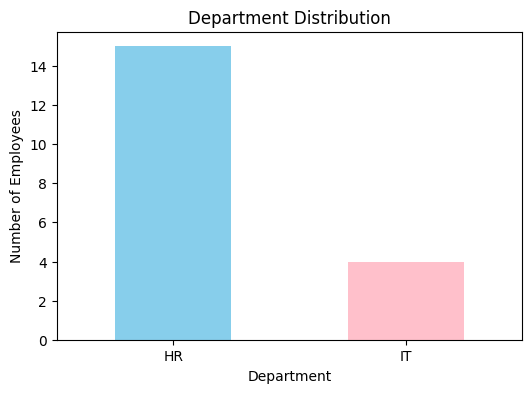

In [143]:
department_counts = df[['Department_hr', 'Department_it']].sum()

department_counts.plot(kind='bar', color=['skyblue', 'pink'], figsize=(6,4))
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0, ticks=[0, 1], labels=['HR', 'IT'])
plt.show()

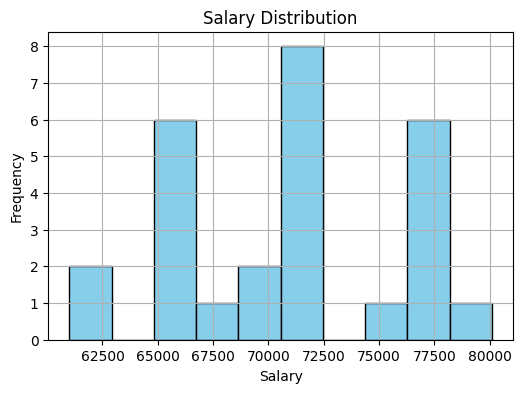

In [144]:
plt.figure(figsize=(6,4))
plt.hist(df['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

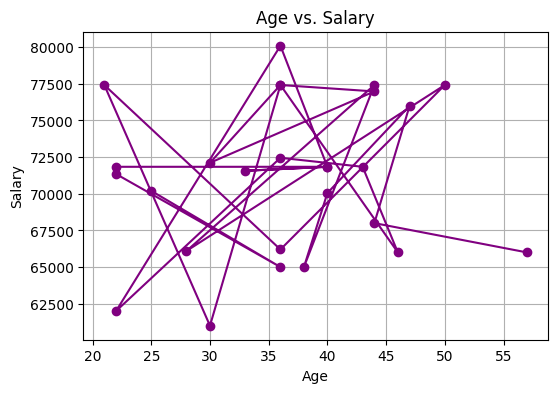

In [145]:
plt.figure(figsize=(6,4))
plt.plot(df['Age'], df['Salary'], marker='o', linestyle='-', color='purple')
plt.title("Age vs. Salary")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


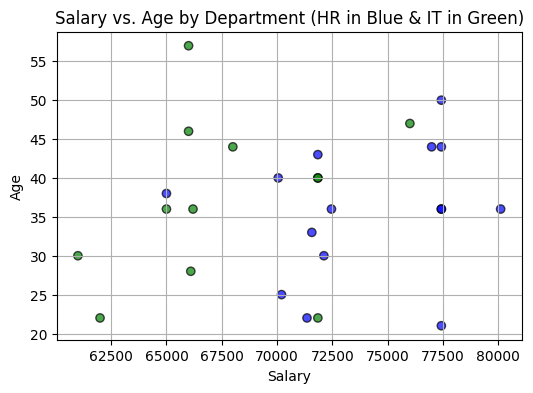

In [147]:
plt.figure(figsize=(6,4))
colors=['blue' if dept == 1 else 'green' for dept in df['Department_hr']]
plt.scatter(df['Salary'], df['Age'], c=colors, alpha=0.7, edgecolor='black')
plt.title('Salary vs. Age by Department (HR in Blue & IT in Green)')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.grid(True)
plt.show()
